# Отчет по предмету "Численные методы"
### "Методы решения задач линейной алгебры" 3
**Студент:** Свистельников Илья Вадимович


**ЗАДАНИЕ 3.1**

Используя таблицу значений $Y_i$ функции y = f(x), вычисленных в точках $X_i$, i = 0, . . . , 3 посторить интерполяционные многочлены
Лагранжа и Ньютона, проходящие через точки $X_i$, $Y_i$. Вычислить значение погрешности интерполяции в точке.

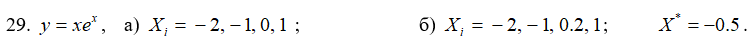

In [ ]:
import numpy as np

def f(x):
  return x*np.exp(x)

X_a = np.array([-2, -1, 0, 1])
X_b = np.array([-2, -1, 0.2, 1])

x_star = -0.5
Y_a = f(X_a)
Y_b = f(X_b)

In [ ]:
def lagrange(x, X, Y):
  L = 0
  n = len(X)
  for i in range(n):
    p = 1
    for j in range(n):
      if i != j:
        p *= (x - X[j]) / (X[i] - X[j])
    L += p * Y[i]
  return L

def diff(X, Y):
  if len(X) == 2:
    return (Y[0] - Y[1]) / (X[0] - X[1])
  return (diff(X[:-1], Y[:-1]) - diff(X[1:], Y[1:])) / (X[0] - X[-1])

def mnozh(X, x):
  n = len(X)
  result = 1
  for i in range(n):
    result *= x - X[i]
  return result

def newton(x, X, Y):
  result = Y[0]
  n = len(X)
  for i in range(2,n):
    result += diff(X[:i], Y[:i]) * mnozh(X[:i-1], x)
  return result


In [ ]:
y_true = f(x_star)
y_lagrange_a = lagrange(x_star, X_a, Y_a)
y_newton_a = newton(x_star, X_a, Y_a)

error_lagrange_a = abs(y_lagrange_a - y_true)
error_newton_a = abs(y_newton_a - y_true)
y_lagrange_b = lagrange(x_star, X_b, Y_b)
y_newton_b = newton(x_star, X_b, Y_b)
error_lagrange_b = abs(y_lagrange_b - y_true)
error_newton_b = abs(y_newton_b - y_true)
print(f"Истинное значение в точке X*={x_star}: {y_true}")
print("Вариант А")
print(f"Значение по Лагранжу: {y_lagrange_a}, погрешность: {error_lagrange_a}")
print(f"Значение по Ньютону: {y_newton_a}, погрешность: {error_newton_a}")
print()
print("Вариант Б")
print(f"Значение по Лагранжу: {y_lagrange_b}, погрешность: {error_lagrange_b}")
print(f"Значение по Ньютону: {y_newton_b}, погрешность: {error_newton_b}")

Истинное значение в точке X*=-0.5: -0.3032653298563167
Вариант А
Значение по Лагранжу: -0.3599078895330501, погрешность: 0.05664255967673337
Значение по Ньютону: -0.24207576006942857, погрешность: 0.06118956978688814

Вариант Б
Значение по Лагранжу: -0.38708131253982875, погрешность: 0.08381598268351204
Значение по Ньютону: -0.20943540055426196, погрешность: 0.09382992930205475


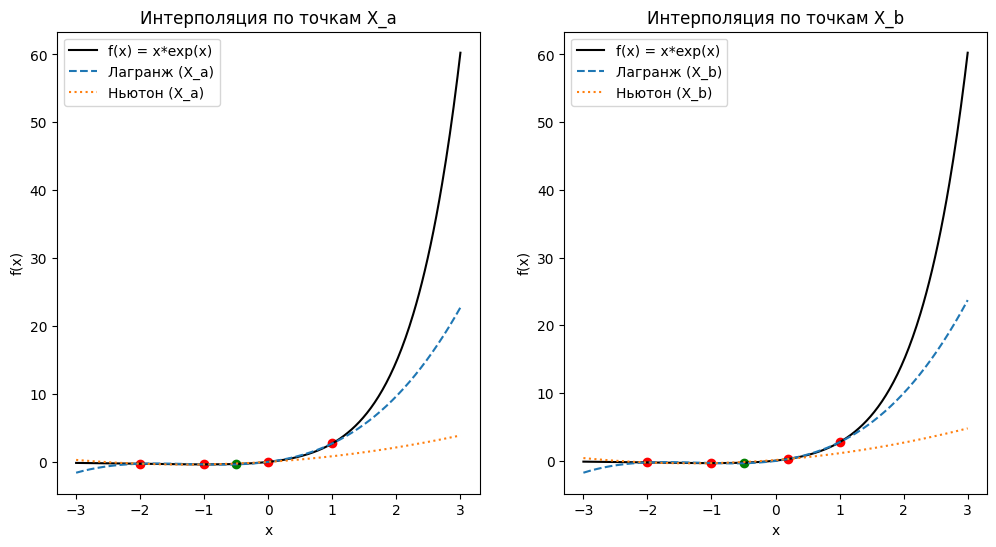

In [ ]:
import matplotlib.pyplot as plt

x_values = np.linspace(-3, 3, 400)
f_values = f(x_values)

L_a_values = [lagrange(x, X_a, Y_a) for x in x_values]
L_b_values = [lagrange(x, X_b, Y_b) for x in x_values]
N_a_values = [newton(x, X_a, Y_a) for x in x_values]
N_b_values = [newton(x, X_b, Y_b) for x in x_values]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_values, f_values, label='f(x) = x*exp(x)', color='black')
plt.plot(x_values, L_a_values, '--', label='Лагранж (X_a)')
plt.plot(x_values, N_a_values, ':', label='Ньютон (X_a)')
plt.scatter(X_a, Y_a, color='red')
plt.scatter(x_star, f(x_star), color='green')
plt.title('Интерполяция по точкам X_a')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_values, f_values, label='f(x) = x*exp(x)', color='black')
plt.plot(x_values, L_b_values, '--', label='Лагранж (X_b)')
plt.plot(x_values, N_b_values, ':', label='Ньютон (X_b)')
plt.scatter(X_b, Y_b, color='red')
plt.scatter(x_star, f(x_star), color='green')
plt.title('Интерполяция по точкам X_b')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()


### Вывод по заданию 3.1

Были построены интерполяционные полиномы по точкам $X_i$, $Y_i$ и вычислены погрешности в точке $X^*$. Построены графики
интерполяции.


**ЗАДАНИЕ 3.2**

Построить кубический сплайн для функции, заданной в узлах интерполяции, предполагая, что сплайн имеет нулевую кривизну при $x=x_0$ и $x=x_4$. Вычислить
значение функции в точке $x=X^*$

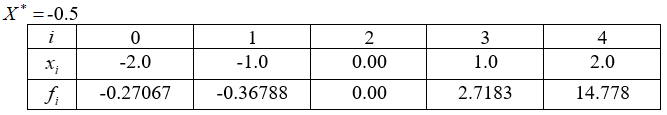

Значение функции в точке -0.5: -0.18394


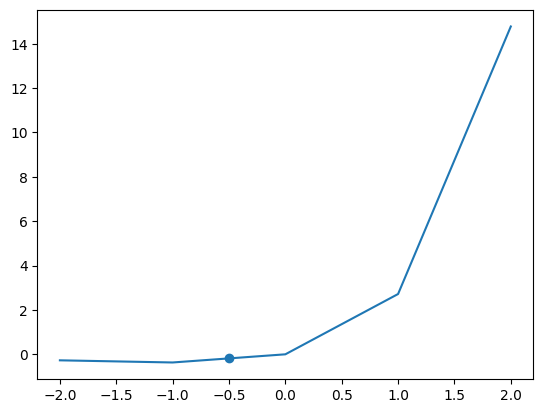

In [ ]:
import numpy as np

# Заданные узлы интерполяции и значения функции
x = np.array([-2.0, -1.0, 0.0, 1.0, 2.0])
y = np.array([-0.27067, -0.36788, 0, 2.7183, 14.778])

# Нахождение коэффициентов для каждого интервала
a = np.zeros(4)
b = np.zeros(4)
c = np.zeros(4)
d = np.zeros(4)

for i in range(4):
    h = x[i+1] - x[i]
    a[i] = 0
    b[i] = 0
    c[i] = (y[i+1] - y[i]) / h
    d[i] = y[i]

# Вычисление значения функции в точке X*
def cubic_spline(x_star):
    for i in range(4):
        if x_star >= x[i] and x_star <= x[i+1]:
            h = x[i+1] - x[i]
            S_star = a[i]*(x_star - x[i])**3 + b[i]*(x_star - x[i])**2 + c[i]*(x_star - x[i]) + d[i]
            return S_star

X_star = -0.5 # Точка, в которой нужно вычислить значение функции
result = cubic_spline(X_star)
print(f'Значение функции в точке {X_star}: {result}')
plt.plot(x,[cubic_spline(i) for i in x])
plt.scatter(X_star,result)

### Вывод по заданию 3.2

Был построен кубический сплайн по заданным точкам и вычисленно значение в точке $X^{*}$.

**ЗАДАНИЕ 3.3**

Для таблично заданной функции путем решения нормальной системы МНК найти
приближающие многочлены a) 1-ой и б) 2-ой степени. Для каждого из приближающих
многочленов вычислить сумму квадратов ошибок. Построить графики приближаемой
функции и приближающих многочленов.

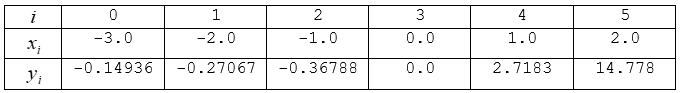

Сумма квадратов ошибок для многочлена 1-ой степени: 78.7491349804819
Сумма квадратов ошибок для многочлена 2-ой степени: 16.748076896337857


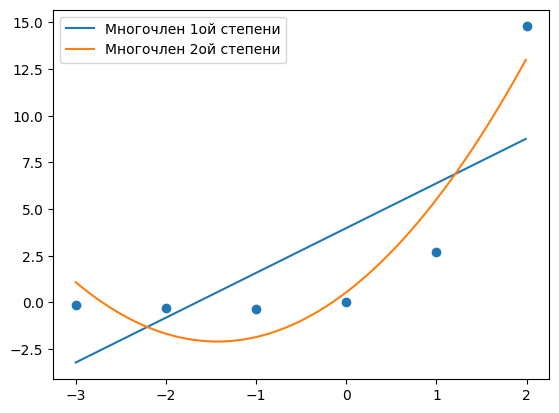

In [ ]:
def SE(Y,Y_shtrix):
    return np.sum((Y-Y_shtrix)**2)

def MNK(X,Y,m):
    A=np.vander(X,m+1)
    Thethas=np.dot(np.dot(np.linalg.inv(np.dot(A.T,A)),A.T),Y)
    return Thethas


X=[-3.0, -2.0, -1.0, 0, 1.0, 2.0]
Y=[-0.14936, -0.27067, -0.36788, 0, 2.7183, 14.778]

x=np.arange(X[0], X[-1], 0.01)
A1=np.vander(x,2)
A2=np.vander(x,3)
Thethas1=MNK(X,Y,1)
Thethas2=MNK(X,Y,2)

plt.plot(x,np.dot(A1,Thethas1),label='Многочлен 1ой степени')
plt.plot(x,np.dot(A2,Thethas2),label='Многочлен 2ой степени')
plt.scatter(X,Y)
plt.legend()
print(f"Сумма квадратов ошибок для многочлена 1-ой степени: {SE(Y,np.dot(np.vander(X,2),Thethas1))}")
print(f"Сумма квадратов ошибок для многочлена 2-ой степени: {SE(Y,np.dot(np.vander(X,3),Thethas2))}")

### Вывод по заданию 3.3

Был реализован алгоритм и построены приближения первого и второго порядков для функции, заданной точками. Рассчитаны суммы квадратов ошибок, на основе которых можно положить, что квадратичная функция лучше аппроксимирует заданный набор точек.

**ЗАДАНИЕ 3.4**

Вычислить  первую  и  вторую  производную  от  таблично  заданной  функции $y_i=f(x_i),i=0,1,2,3,4$ в точке $x=X^*$ \
$X^*=1.0$.

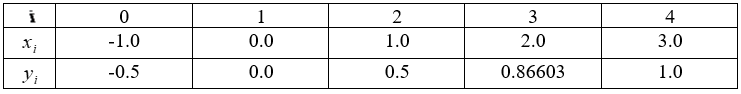

In [ ]:
def dy(X,Y,x):
    n=len(X)
    for i in range(n-1):
        if X[i]<=x and x<=X[i+1]:
            return (Y[i+1]-Y[i])/(X[i+1]-X[i])

def d2y(X,Y,x):
    n=len(X)
    for i in range(n-2):
        if X[i]<=x and x<=X[i+1]:
            return 2*((Y[i+2]-Y[i+1])/(X[i+2]-X[i+1])-(Y[i+1]-Y[i])/(X[i+1]-X[i]))/(X[i+2]-X[i])

X=[-1, 0, 1, 2, 3]
Y=[-0.5, 0, 0.5, 0.86603, 1]

x_star=1

print(f"Значения вычисленные для первой производной: {dy(X,Y,x_star)}")
print(f"Значения вычисленные для второй производной: {d2y(X,Y,x_star)}")

Значения вычисленные для первой производной: 0.5
Значения вычисленные для второй производной: -0.13397000000000003


### Вывод по заданию 3.4

Были произведены расчеты первой и второй  производной в точке $X^{*}$.

**ЗАДАНИЕ 3.5**

Вычислить определенный интеграл $\large F=\int_{x_0}^{x_1}ydx \ $,
методами прямоугольников, трапеций, Симпсона с шагами $h_1,h_2$. Оценить погрешность вычислений, используя Метод Рунге-Ромберга.

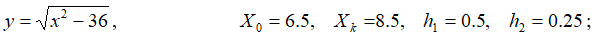

In [ ]:
def f(x):
  return (x*x - 36)**0.5

X0 = 6.5
X1 = 8.5
h1 = 0.5
h2 = 0.25

def rectangle_method(a, b, h):
  n = int((b - a) / h)
  result = 0
  for i in range(0,n):
    result += f(a + (i + 0.5) * h)
  result *= h
  return result

def trapezoidal_method(a, b, h):
  n = int((b - a) / h)
  result = 0.5 * (f(a) + f(b))
  for i in range(1, n):
    result += f(a + i*h)
  result *= h
  return result

def simpson_method(a, b, h):
  n = int((b - a) / h)
  if n % 2 == 1:
    n += 1
  result = f(a) + f(b)
  for i in range(1, n, 2):
    result += 4 * f(a + i*h)
  for i in range(2, n-1, 2):
    result += 2 * f(a + i*h)
  result *= h / 3
  return result

def runge_romberg(r1, r2, h1, h2, p):
  return r1 + (r1 - r2) / ((h2/h1)**p - 1)

R1_rect = rectangle_method(X0, X1, h1)
R2_rect = rectangle_method(X0, X1, h2)
R1_trap = trapezoidal_method(X0, X1, h1)
R2_trap = trapezoidal_method(X0, X1, h2)
R1_simp = simpson_method(X0, X1, h1)
R2_simp = simpson_method(X0, X1, h2)

print("Метод прямоугольников (h1):", R1_rect)
print("Метод прямоугольников (h2):", R2_rect)
print("Метод трапеций (h1):", R1_trap)
print("Метод трапеций (h2):", R2_trap)
print("метод Симпсона (h1):", R1_simp)
print("метод Симпсона (h2):", R2_simp)

# Уточнённые значения методом Рунге-Ромберга
RR_rect = runge_romberg(R1_rect, R2_rect, h1, h2, 2)
RR_trap = runge_romberg(R1_trap, R2_trap, h1, h2, 2)
RR_simp = runge_romberg(R1_simp, R2_simp, h1, h2, 2)

print("\nРунге-Ромберг-Ричардсон для прямоугольников:", RR_rect)
print("Погрешность:", np.abs(R2_rect-RR_rect))
print("Рунге-Ромберг-Ричардсон для трапеций:", RR_trap)
print("Погрешность:", np.abs(R2_trap-RR_trap))
print("Рунге-Ромберг-Ричардсон для Симпсона:", RR_simp)
print("Погрешность:", np.abs(R2_simp-RR_simp))

Метод прямоугольников (h1): 8.864882206139189
Метод прямоугольников (h2): 8.856018864390062
Метод трапеций (h1): 8.828726271145623
Метод трапеций (h2): 8.846804238642406
метод Симпсона (h1): 8.851502146628137
метод Симпсона (h2): 8.852830227807999

Рунге-Ромберг-Ричардсон для прямоугольников: 8.853064417140354
Погрешность: 0.0029544472497082808
Рунге-Ромберг-Ричардсон для трапеций: 8.852830227808
Погрешность: 0.006025989165594936
Рунге-Ромберг-Ричардсон для Симпсона: 8.85327292153462
Погрешность: 0.00044269372662064654


### Вывод по заданию 3.5

Были разработаны алгоритмы численного интегрированию: м. прямоугольников , м. трапеций, м. Симпсона. Произведена корректировка сумм с помощью метода Рунге-Ромберга и произведена оценка погрешности алгоритмов. Самым точным оказался алгоритм Симпсона.